In [1]:
import sympy as sp

In [2]:
s, z, t, k, K = sp.symbols('s, z, t, k, K')
Uz = sp.Function('U')(z)
Ez = sp.Function('E')(z)
Ys = sp.Function('Y')(s)

In [3]:
T = 0.1

In [4]:
Ys_eq = sp.Eq(Ys, 1/(s*(s+2)))
Ys_eq

Eq(Y(s), 1/(s*(s + 2)))

In [39]:
a = 2

In [6]:
# 2.1

ctrl_difs = sp.Eq(Uz, K*Ez)
ctrl_difs

Eq(U(z), K*E(z))

In [7]:
Ys_1 = Ys_eq.rhs*(1/s)

In [8]:
Ys_2w = (4)*Ys_1
with sp.evaluate(False):
    Ys_eq2 = (sp.Eq(Ys_1, (1/4)*Ys_2w, evaluate=False))
Ys_eq2

Eq(1/(s**2*(s + 2)), 0.25*(4/(s**2*(s + 2))))

In [9]:
Hz = sp.Function('H')(z)

In [43]:
a, T = sp.symbols('a, T')
(a*T-1+sp.exp(-a*T))

T*a - 1 + exp(-T*a)

In [44]:
# 2.2

Hz_eq = sp.Eq(Hz, (
    .25*(
        (
            (a*T-1+sp.exp(-a*T)) +
            ( 1 - sp.exp(-a*T) - a*T*sp.exp(-a*T) )*(z**-1)
        )*(z**-1)
    )
    /
    ( 
        ( (1 - (z**-1))**2 ) * 
        ( 1 - sp.exp(-a*T)*(z**-1) ) 
    )
) * (1-(z**-1)) )
Hz_eq

Eq(H(z), 0.25*(T*a - 1 + exp(-T*a) + (-T*a*exp(-T*a) + 1 - exp(-T*a))/z)/(z*(1 - 1/z)*(1 - exp(-T*a)/z)))

In [11]:
Hz_eq.rhs.expand().simplify()

0.00438077407660545/(z**2 - 1.81873075307798*z + 0.818730753077982) + 0.00468268826949544/(z - 1.81873075307798 + 0.818730753077982/z)

In [12]:
tfz = Hz_eq.rhs*K/(Hz_eq.rhs*K + 1)
tfz

0.25*K*(0.0187307530779818 + 0.0175230963064218/z)/(z*(1 - 1/z)*(1 - 0.818730753077982/z)*(0.25*K*(0.0187307530779818 + 0.0175230963064218/z)/(z*(1 - 1/z)*(1 - 0.818730753077982/z)) + 1))

In [13]:
tfz = sp.simplify(tfz)
tfz

0.25*K*(0.0187307530779818*z + 0.0175230963064218)/(0.25*K*(0.0187307530779818*z + 0.0175230963064218) + (z - 1)*(z - 0.818730753077982))

In [14]:
tfz_ksubs = tfz.subs(K, 1)
tfz_ksubs

0.25*(0.0187307530779818*z + 0.0175230963064218)/(0.00468268826949544*z + (z - 1)*(z - 0.818730753077982) + 0.00438077407660545)

In [15]:
#2.3
tfz_simp = tfz_ksubs.expand().simplify()
tfz_simp

(0.00468268826949544*z + 0.00438077407660545)/(z**2 - 1.81404806480849*z + 0.823111527154587)

In [16]:
import sys
import os
sys.path.append(os.path.split(os.getcwd())[0])

In [17]:
print(sys.path)

['C:\\Users\\luiz\\PycharmProjects\\college_crap\\controle_de_processos', 'C:\\Users\\luiz\\PycharmProjects\\college_crap', 'C:\\Program Files\\Python310\\python310.zip', 'C:\\Program Files\\Python310\\DLLs', 'C:\\Program Files\\Python310\\lib', 'C:\\Program Files\\Python310', '', 'C:\\Users\\luiz\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Program Files\\Python310\\lib\\site-packages', 'C:\\Program Files\\Python310\\lib\\site-packages\\win32', 'C:\\Program Files\\Python310\\lib\\site-packages\\win32\\lib', 'C:\\Program Files\\Python310\\lib\\site-packages\\Pythonwin', 'C:\\Users\\luiz\\PycharmProjects\\college_crap']


In [18]:
from college_crap_lib.ctrl.control_ii import rutiruti_jury, eval_rutiruti_jury

In [19]:
eval_rutiruti_jury([1, -1.81404806480849, 0.823111527154587])


jury_result=[0.823111527154587, -0.9950285749329647]
Stable!


In [20]:
tfz.expand().simplify()

K*(0.00468268826949544*z + 0.00438077407660545)/(0.00468268826949544*K*z + 0.00438077407660545*K + z**2 - 1.81873075307798*z + 0.818730753077982)

0.00438077407660545*K + 0.818730753077982

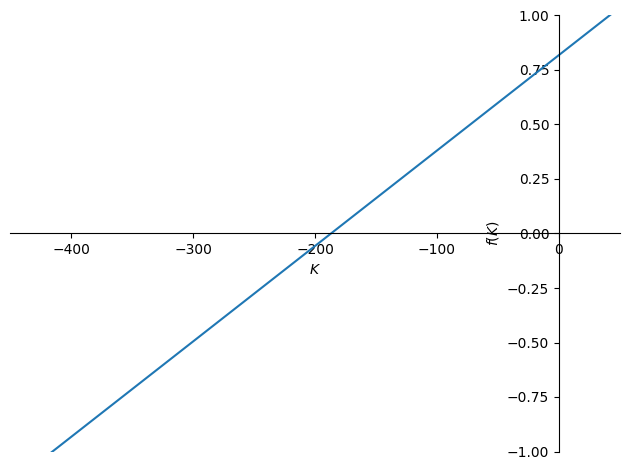

(2.05137993798301e-5*K**2 - 0.00881627591159113*K + 0.32967995396436)/(1.91911815102583e-5*K**2 + 0.00717334891760736*K - 0.32967995396436)

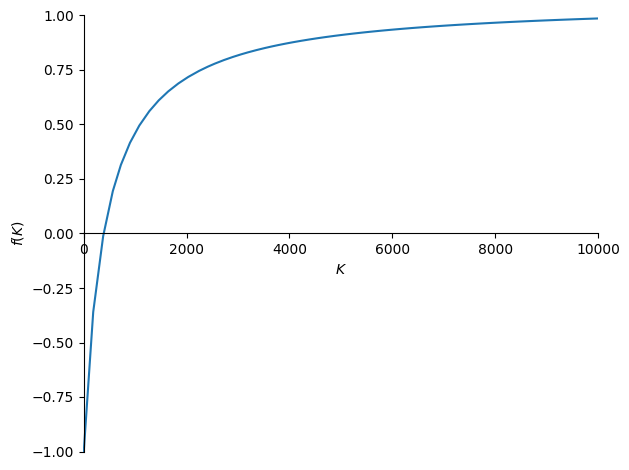

In [21]:
general_stability = rutiruti_jury([1, 0.00468268826949544*K-1.81873075307798, 0.00438077407660545*K + 0.818730753077982])
term1, term2 = general_stability

range1 = (-450, 50)
simp_term = term1.expand().simplify()
display(simp_term)
sp.plot(simp_term, (K, *range1), xlim=[*range1], ylim=[-1,1])  # range=[-100, 100], xlim=[-100, 100], ylim=[-1,1]

range2 = (-5, 10000)
simp_term = term2.expand().simplify()
display(simp_term)
sp.plot(simp_term, (K, *range2), xlim=[*range2], ylim=[-1,1])  # range=[-100, 100], xlim=[-100, 100], ylim=[-1,1]
    

In [22]:
term2.subs(K, 0)

-0.999999999999999

In [23]:
conditions_t1 = [sp.solve(term1+1, K), sp.solve(term1-1, K)]
conditions_t2 = [sp.solve(term2+1, K), sp.solve(term2-1, K)]
conditions = (conditions_t1, conditions_t2)
conditions

([[-415.161960255040], [41.3783600231854]],
 [[6.40895994461219e-14], [12047.9977153027]])

In [24]:
# 2.4
final_condition = []
for cond_low, cond_high in conditions:
    if final_condition:
        if cond_low>final_condition[0]:
            final_condition[0] = cond_low
        if cond_high<final_condition[1]:
            final_condition[1] = cond_high
    else:
        final_condition = [cond_low, cond_high]
final_condition

[[6.40895994461219e-14], [41.3783600231854]]

In [25]:
tfz_solve_by_poles = sp.solve(1/tfz.expand().simplify().args[1], z)
tfz_solve_by_poles

[-0.00234134413474772*K - 0.0929464827629851*sqrt(0.000634548151576261*K**2 - K + 0.950872635993396) + 0.90936537653899,
 -0.00234134413474772*K + 0.0929464827629851*sqrt(0.000634548151576261*K**2 - K + 0.950872635993396) + 0.90936537653899]

In [26]:
for pl_slv in tfz_solve_by_poles:
    for val in [-1, 1]:
        print(f'{val = }:')
        display(sp.solve(pl_slv-val, K))

val = -1:


[-1.59955339837463e+17]

val = 1:


[]

val = -1:


[12047.9977153016]

val = 1:


[-2.19946811597878e-13, 4.80185838829636e+18]

Abs(0.00234134413474772*K + 0.0929464827629851*sqrt(0.000634548151576261*K**2 - K + 0.950872635993396) - 0.90936537653899)

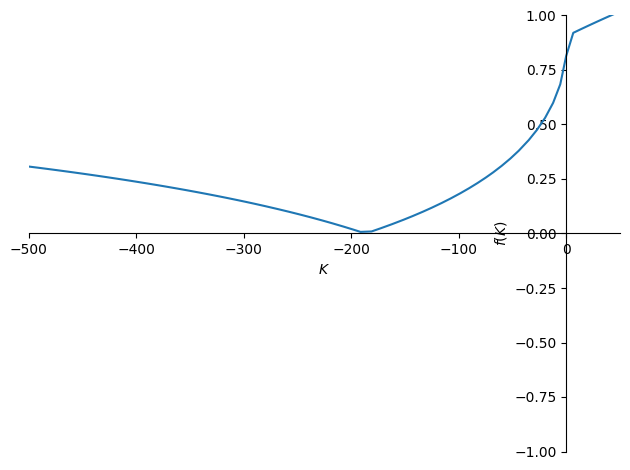

Abs(-0.00234134413474772*K + 0.0929464827629851*sqrt(0.000634548151576261*K**2 - K + 0.950872635993396) + 0.90936537653899)

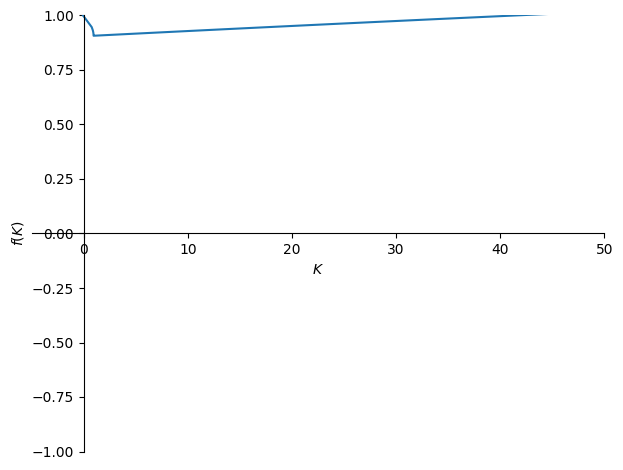

In [27]:
range_val = (-500, 50)
simp_term = tfz_solve_by_poles[0].expand().simplify()
display(abs(simp_term))
sp.plot(abs(simp_term) , (K, *range_val), xlim=[*range_val], ylim=[-1,1]) 

range_val = (-5, 50)
simp_term = tfz_solve_by_poles[1].expand().simplify()
display(abs(simp_term))
sp.plot(abs(simp_term) , (K, *range_val), xlim=[*range_val], ylim=[-1,1]) 

In [28]:
tfz_solve_by_poles[0].subs(K, 41)

0.813370267014333 - 0.580319997032531*I

In [29]:
v1, v2 = sp.symbols('v1, v2')

In [30]:
tfz_simp_num = tfz_simp.args[1]
tfz_simp_den = 1/tfz_simp.args[0]

display(tfz_simp_num)
display(tfz_simp_den)

0.00468268826949544*z + 0.00438077407660545

z**2 - 1.81404806480849*z + 0.823111527154587

In [31]:
sp.solve(tfz_simp_den - ((z - v1)*(z - v2)), (v1, v2))

[(0.907024032404245 - 0.0204678234243438*I,
  0.907024032404245 + 0.0204678234243438*I),
 (0.907024032404245 + 0.0204678234243438*I,
  0.907024032404245 - 0.0204678234243438*I)]

In [32]:
# q1
gc = (3-2.5*(z**-1))/(1-(z**-1))
gc

(3 - 2.5/z)/(1 - 1/z)

In [33]:
a

2

In [34]:
a, b = sp.symbols('a, b')

In [35]:
eq = a*(z-4) + b*(z-2) - 8

In [36]:
sp.solve(eq, (a,b))

{a: -4, b: 4}

In [37]:
eq = 4*((4**-k)-(2**-k))
eq

4/4**k - 4/2**k

In [38]:
for inpt in [0,1,2]:
    display(eq.subs(k, inpt))

0

-1

-3/4